# SPAM EMAIL DETECTION


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

C:\Users\DELL\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Read data

In [2]:
df = pd.read_csv("spam.csv",encoding="latin-1")

In [3]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


## Exploratory Data Analysis (EDA) and Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1 , inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.columns=["Type","Message"]

In [9]:
df.head()

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.describe()

,Type,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
df.describe(include="object")

,Type,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Type     5572 non-null   int64 
 1   Message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


<AxesSubplot:ylabel='Type'>

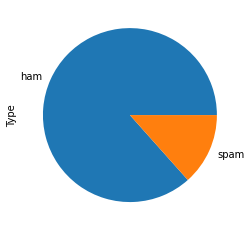

In [13]:
df.Type.value_counts().plot(kind="pie")

In [14]:
df["Type"]= df["Type"].apply(lambda x:1 if x=="spam" else 0)

In [15]:
df.head()

,Type,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


##  Count Vectorizer

In [16]:
cv= CountVectorizer()
x= cv.fit_transform(df["Message"]).toarray()
y=np.array(df["Type"])
cv.get_feature_names_out()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
cv.get_feature_names_out()
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Model

In [17]:
clf= MultinomialNB()
clf.fit(x_train,y_train)

MultinomialNB()

In [18]:
clf.score(x_test,y_test)

0.9784688995215312

In [19]:
predict = clf.predict(x_test)
for i in range(0,len(predict)):

    print("Predicted value=>",predict[i], " Real value=>",y_test[i] )


Predicted value=> 1  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 1  Real value=> 1
Predicted value=> 0  Real value=> 0
Predicted value=> 1  Real value=> 1
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 1  Real value=> 1
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 1  Real value=> 1
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 1  Real value=> 1
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real va

Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 1  Real value=> 1
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 1  Real value=> 1
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 1  Real value=> 1
Predicted value=> 1  Real value=> 1
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 1
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real va

Predicted value=> 1  Real value=> 1
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 1  Real value=> 1
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 1  Real value=> 1
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 1  Real value=> 1
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 1  Real value=> 1
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real va

Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 1  Real value=> 1
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 1  Real value=> 1
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 1
Predicted value=> 0  Real va

Predicted value=> 0  Real value=> 0
Predicted value=> 1  Real value=> 1
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 1  Real value=> 1
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 1  Real value=> 1
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 1  Real value=> 1
Predicted value=> 0  Real value=> 0
Predicted value=> 1  Real value=> 1
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 1  Real value=> 1
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 1  Real value=> 1
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real value=> 0
Predicted value=> 0  Real va